In [1]:
import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def extract_data(filename):
    with open(filename) as infile:
        content = infile.read()
    
    transcription = re.findall(r'Transcription\s+(.+)', content)
    whisper = re.findall(r'Whisper:\s+(.+)', content)
    mistral = re.findall(r'Mistral:\s+(.+)', content)
    time = re.findall(r'time:\s+(.+)', content)
    
    plan = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # umulig å få til
    
    return {
        'transcription': list(map(int, transcription)),
        'whisper': list(map(str, whisper)),
        'mistral': list(map(str, mistral)),
        'time': list(map(float, time)),
        'plan': list(map(int, plan))
    }

In [44]:
data = extract_data('results.txt')
df = pd.DataFrame(data)
df.loc[25, 'mistral'] = ''

test_1 = df.loc[df['transcription'] == 1]
test_2 = df.loc[df['transcription'] == 2]
test_3 = df.loc[df['transcription'] == 3]
test_4 = df.loc[df['transcription'] == 4]

test_1_mean = test_1['time'].mean()
test_2_mean = test_2['time'].mean()
test_3_mean = test_3['time'].mean()
test_4_mean = test_4['time'].mean()

mean_times = [test_1_mean, test_2_mean, test_3_mean, test_4_mean]

success_rate = df['plan'].mean()
print(f'Success rate: {success_rate}')
df

Success rate: 0.95


,transcription,whisper,mistral,time,plan
0,1,Move the new pallet from the unload zone to sh...,instance new\_pallet pallet|predicate pallet_a...,6.92,1
1,1,Move the new pallet from the unload zone to sh...,instance new\_pallet pallet|predicate pallet\_...,7.05,1
2,1,Move the new pallet from the unload zone to sh...,instance new_pallet pallet|predicate pallet_at...,6.92,1
3,1,Move the new pallet from the unload zone to sh...,instance new_pallet pallet|predicate pallet_at...,6.95,1
4,1,Move the new pallet from the unload zone to sh...,instance new\_pallet pallet|predicate pallet_a...,6.99,1
5,1,Move the new pallet from the unload zone to sh...,instance new\_pallet pallet|predicate pallet\_...,6.91,1
6,1,Move the new pallet from the unload zone to sh...,instance new\_pallet pallet|predicate pallet_a...,7.02,1
7,1,Move the new pallet from the unload zone to sh...,instance new_pallet pallet|predicate pallet_at...,6.87,1
8,1,Move the new pallet from the unload zone to sh...,instance new_pallet pallet|predicate pallet_at...,6.98,1
9,1,Move the new pallet from the unload zone to sh...,instance new\_pallet pallet|predicate pallet_a...,6.97,1


[]

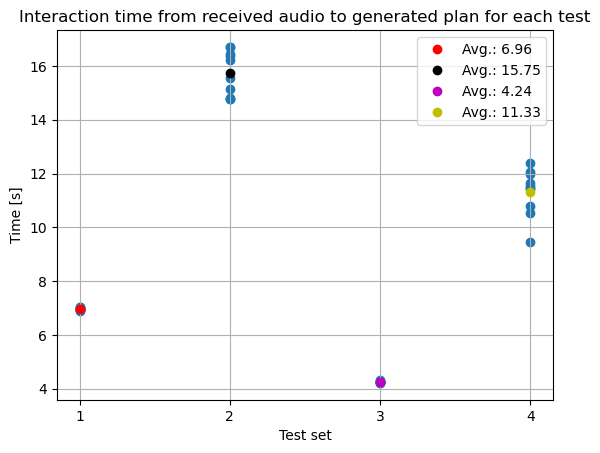

In [42]:
plt.scatter(df['transcription'], df['time'])

for i in range(len(mean_times)):
    if i == 0:
        colour = 'ro'
    elif i == 1:
        # orange circle
        colour = 'ko'
    elif i == 2:
        # purple circle
        colour = 'mo'
    else:
        colour = 'yo'
    # plt.text(y=mean_times[i], x=i+1.3 if i != 3 else 3.6, s=f'{round(mean_times[i], 2)} s', fontsize=15, ha='center', va='bottom')
    plt.plot(i+1, mean_times[i], colour, label=f'Avg.: {round(mean_times[i], 2)}')

plt.xlabel('Test set')
plt.ylabel('Time [s]')
plt.title('Interaction time from received audio to generated plan for each test')
plt.xticks([1, 2, 3, 4])
plt.grid()
plt.legend()
plt.savefig('semrebot2_interaction_time.pdf', format='pdf')
plt.plot()